In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Copyright (c) 2022 Milan Ondrašovič <milan.ondrasovic@gmail.com>
#
# MIT License
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import config as cfg
from dataset import load_dataset_and_extract_features, regression_label_getter
from visual import plot_linear_feature_importance

plt.style.use('dark_background')

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import config as cfg
from dataset import (
    create_image_compression_dataset, build_quality_factors_gen
)

In [3]:
quality_factors_gen = build_quality_factors_gen(
    quality_factors=(55, 65, 75, 85, 95),
    min_deviation=4,
    max_deviation=5
)

create_image_compression_dataset(
    cfg.INPUT_IMGS_DIR_PATH, cfg.TRAIN_DIR_PATH, cfg.TEST_DIR_PATH,
    quality_factors_gen, save_uncompressed=False
)

test: 100%|██████████| 29/29 [00:00<00:00, 38.99it/s]


In [4]:
label_getter = regression_label_getter

In [5]:
features_train, labels_train = load_dataset_and_extract_features(
    cfg.TRAIN_DIR_PATH, label_getter
)
features_test, labels_test = load_dataset_and_extract_features(
    cfg.TEST_DIR_PATH, label_getter
)

features_train.shape, features_test.shape

100%|██████████| 145/145 [00:05<00:00, 28.27it/s]


((590, 192), (145, 192))

In [6]:
np.unique(labels_train, return_counts=True)

(array([ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([ 9, 10, 12, 10, 14, 10, 14, 15, 10, 14, 20,  8, 14, 11, 13, 12, 10,
        10,  9, 11, 13, 15, 14, 11,  6,  9, 14,  9, 12, 15,  9,  7, 12, 17,
        15, 13, 10, 12, 11, 12, 13, 10, 11, 13, 11, 13, 11, 17,  9, 10],
       dtype=int64))

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# model = LogisticRegression(
#     max_iter=5000, multi_class='multinomial', random_state=731995
# )
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=731995, verbose=True)
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', model)
    ],
    verbose=True
)

pipeline.fit(features_train, labels_train)

labels_pred = pipeline.predict(features_test)

from sklearn.metrics import r2_score

print(r2_score(labels_test, labels_pred))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
      Iter       Train Loss   Remaining Time 
         1         195.0746           11.98s
         2         184.2128           11.45s
         3         174.1579           12.59s
         4         165.1985           13.39s
         5         157.3300           12.47s
         6         150.6194           12.27s
         7         143.7711           11.83s
         8         137.8035           11.69s
         9         132.0122           11.40s
        10         127.3326           11.07s
        20         102.4382            9.41s
        30          85.1419            8.75s
        40          72.5207            9.10s
        50          61.7362            8.98s
        60          53.6809            8.76s
        70          46.5837            8.48s
        80          41.8356            8.11s
        90          37.2194            7.81s
       100          32.8904            7.51s
       200          11.4863 

In [ ]:

labels_pred = pipeline.predict(features_test)

from sklearn.metrics import r2_score

print(r2_score(labels_test, labels_pred))

In [17]:
labels_pred = pipeline.predict(features_test)

from sklearn.metrics import r2_score

print(r2_score(labels_test, labels_pred))

0.3977779354163482


In [18]:
labels_test, labels_pred

(array([ 57,  66,  78,  90,  93,  60,  61,  78,  87,  98,  60,  68,  79,
         81,  94,  59,  67,  73,  89,  99,  54,  63,  77,  83,  91,  54,
         70,  72,  83,  98,  55,  68,  72,  82,  91,  60,  65,  76,  84,
         99,  55,  67,  77,  81,  91,  54,  62,  71,  83,  94,  59,  65,
         74,  87,  94,  59,  63,  75,  84,  97,  54,  62,  71,  85,  92,
         52,  69,  75,  88,  91,  52,  64,  79,  89,  99,  55,  61,  77,
         86, 100,  56,  70,  77,  83,  98,  59,  69,  74,  83,  91,  59,
         66,  74,  85,  99,  52,  61,  73,  88,  96,  52,  67,  77,  81,
         92,  59,  65,  76,  85,  91,  56,  70,  74,  87,  92,  58,  69,
         75,  89,  92,  51,  61,  72,  87,  96,  56,  68,  80,  87,  98,
         53,  67,  75,  82,  98,  59,  68,  71,  86,  91,  51,  68,  75,
         89,  95]),
 array([66.23 , 79.305, 83.11 , 77.94 , 83.765, 73.085, 73.28 , 73.475,
        78.77 , 74.88 , 60.03 , 71.205, 87.245, 87.485, 81.72 , 56.765,
        62.955, 70.49 , 65.965, 7

E:\venvs\siam-mot\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


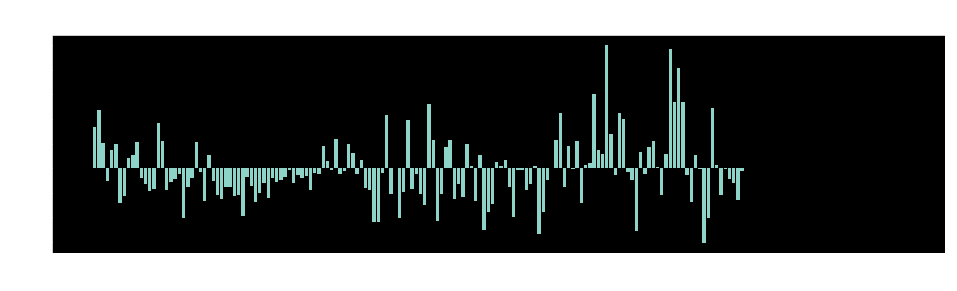

In [9]:
fig = plot_linear_feature_importance(model)
fig.show()